# LinkedIn Posts

In [1]:
import pandas as pd
import spacy

In [2]:
df = pd.read_json('posts.json')

In [3]:
df

,descripcion,fecha
0,Here we have the lead trends for 2022!!!▪️Arti...,17/12/2021
1,It’s almost 2022 and we want to share the AI l...,15/12/2021
2,"""...Here we [...] demonstrate a method by whic...",10/12/2021
3,The limit of RPA is the imagination of the pro...,9/12/2021
4,Introducing an indoor garden controlled with a...,2/12/2021
...,...,...
266,Have you seen the future of the creative proce...,27/3/2023
267,It's fascinating how our understanding of brai...,29/3/2023
268,This is a summary of our last article: Artific...,30/3/2023
269,Nature has inspired a lot of innovations from ...,31/3/2023


In [4]:
df['descripcion'][56]

'▪️Data are the new gold!! If you have organized quality data, you started the first step to digital transformation. ▪️ #data + #AI = Best business decision-making to boost your enterprise.'

In [5]:
corpus=df["descripcion"]

In [6]:
# !python -m spacy download en_core_web_lg
nlp = spacy.load("en_core_web_lg")

In [7]:
def clean_hashtag_url(post):
    """
    remove all hastags and website links from a string
    """    

    return " ".join(word for word in post.split(' ') if ("#" not in word and "http" not in word))

In [8]:
corpus = corpus.apply(clean_hashtag_url)

In [9]:
import re 

def punct_space(token):
    """
    helper function to eliminate tokens
    that are pure punctuation or whitespace
    """

    return token.is_punct or token.is_space


def rm_pattern(post):
    """
    function returning a string without "...see more" and website links from the post. 
    This function uses "re.sub" to remove a specific pattern"""

    post = re.sub("…see more",'', post) # replace pattern by an empty string
    post = re.sub('http','',post)
    return post



def rules(token):
    """
    conditions to select a specific token for the corpus cleaning
    used with all() function : return True if all True.
    Conditions are : no pure puncuation - no pure whitespace - not a stopword 
    - not a #word
    """

    return [not punct_space(token),
            token not in nlp.Defaults.stop_words] 

In [10]:
def corpus_cleaning(posts):
    """
    generator function using spaCy to parse posts,
    remove "...see more" pattern, website links, lemmatize the text, lowercase words, and apply all the conditions we have set in rules.
    What this function returns is a generator (a "list") of individual tokens contained in lists. 
    """
    
    for post in nlp.pipe(posts.apply(rm_pattern)):
        yield ' '.join([token.lemma_.lower() for token in post if all(rules(token))])

In [11]:
preprocessed_posts = corpus_cleaning(corpus)
preprocessed_posts

<generator object corpus_cleaning at 0x000001F9A96F5380>

In [12]:
streamed_posts = (post.split(' ') for post in preprocessed_posts)
streamed_posts

<generator object <genexpr> at 0x000001F9A96F5460>

In [13]:
# for post in streamed_posts:
#     print(post)

In [14]:
all_posts = []

for streamed_post in streamed_posts:
    post = ' '.join(streamed_post)
    all_posts.append(post)

In [15]:
all_posts

['here we have the lead trend for 2022!!! ▪ ️artificial intelligence ▪ ️data and analytics ▪ ️rpawhich one will you implement in your business',
 'it ’ almost 2022 and we want to share the ai lead trend for the future year',
 'here we demonstrate a method by which can aid mathematician in discover new and that be simply amazing how thing be evolve in this field',
 'the limit of rpa be the imagination of the programmer 🤖 ▪ ️can you tell we a rpa out of the box application juan carlos castaño valencia diana cristhina pérez pérez fabian esteban peña castillo',
 'introduce an indoor garden control with an app and ai to enjoy fresh vegetable every day it will let you grow 64 plant simultaneously green ai mashable',
 'five way al contribute to wildlifeconservation 1 vast data collection 📊 2 study and protect specie 🐨 3 track wildlife pattern 📈 4 prediction of endanger specie 🐼 5 classify animal specie',
 'the participant of the plan semilla apprenticeship talk about their experience in the l

In [16]:
df['descripcion_clean'] = all_posts

In [17]:
df.head()

,descripcion,fecha,descripcion_clean
0,Here we have the lead trends for 2022!!!▪️Arti...,17/12/2021,here we have the lead trend for 2022!!! ▪ ️art...
1,It’s almost 2022 and we want to share the AI l...,15/12/2021,it ’ almost 2022 and we want to share the ai l...
2,"""...Here we [...] demonstrate a method by whic...",10/12/2021,here we demonstrate a method by which can aid ...
3,The limit of RPA is the imagination of the pro...,9/12/2021,the limit of rpa be the imagination of the pro...
4,Introducing an indoor garden controlled with a...,2/12/2021,introduce an indoor garden control with an app...


## Extracción de bigramas

In [22]:
from gensim.models import Phrases

preprocessed_posts = corpus_cleaning(corpus)
streamed_posts = (post.split(' ') for post in preprocessed_posts)
bigram_model = Phrases(streamed_posts,min_count=5,threshold=10)

In [25]:
bigram_posts = []

preprocessed_posts = corpus_cleaning(corpus)
streamed_posts = (post.split(' ') for post in preprocessed_posts)

for streamed_post in streamed_posts:
    bigram_post = ' '.join(bigram_model[streamed_post])
    bigram_posts.append(bigram_post)

In [26]:
bigram_posts

['here we have the lead trend for 2022!!! ▪ ️artificial intelligence ▪ ️data and analytics ▪ ️rpawhich one will you implement in your_business',
 'it ’ almost 2022 and we_want to share the ai lead trend for the future year',
 'here we demonstrate a method by which can aid mathematician in discover new and that be simply amazing how thing be evolve in this field',
 'the limit of rpa be the imagination of the programmer 🤖 ▪ ️can you tell we a rpa out of the box application juan carlos castaño valencia diana cristhina pérez pérez fabian esteban peña castillo',
 'introduce an indoor garden control with an app and ai to enjoy fresh vegetable every day it will let you grow 64 plant simultaneously green ai mashable',
 'five way al contribute to wildlifeconservation 1 vast data collection 📊 2 study and protect specie 🐨 3 track wildlife pattern 📈 4 prediction of endanger specie 🐼 5 classify animal specie',
 'the participant of the plan_semilla apprenticeship talk_about their experience in the l

## LDA

In [79]:
from gensim.corpora import Dictionary
posts = pd.Series(bigram_posts)

# Dictionary recquired to split the sentences into a list of words. Let's use split() function
streamed_posts = posts.apply(lambda str : str.split())

# Then we learn the dictionary by iterating over all of the reviews
# It return a generator
posts_dictionary = Dictionary(streamed_posts)

In [80]:
posts_dictionary

In [81]:
posts_dictionary.filter_extremes(no_below=10, no_above=0.5)
posts_dictionary.compactify()

In [82]:
bag_of_words = [posts_dictionary.doc2bow(post) for post in streamed_posts]

In [83]:
from gensim.models import LdaModel

num_topics = 5

# Train the model on the corpus.
lda = LdaModel(corpus=bag_of_words, id2word=posts_dictionary, num_topics=num_topics, passes=20,
                iterations=1000, random_state=100)

In [84]:
lda

In [85]:
def explore_topic(topic_number, topn=25):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print ('{:20}{}'.format('term', 'frequency'))

    for term, frequency in lda.show_topic(topic_number,topn):
        print ("{:20}{:.03f}".format(term, round(frequency, 3)))

In [86]:
explore_topic(2, topn=25)

term                frequency
we                  0.020
our                 0.018
with                0.017
ai                  0.016
of                  0.013
it                  0.012
for                 0.012
you                 0.011
a                   0.011
have                0.010
that                0.010
this                0.007
will                0.006
how                 0.006
can                 0.006
your                0.006
human               0.006
thank_you           0.005
▪                   0.004
equinox             0.004
an                  0.004
's                  0.004
design              0.004
do_you              0.004
use                 0.004


In [87]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

LDAvis_prepared = gensimvis.prepare(lda, bag_of_words,
                                              posts_dictionary)
pyLDAvis.display(LDAvis_prepared)

c:\Users\ynino\AppData\Local\anaconda3\envs\PLANSEMILLA\Lib\site-packages\pyLDAvis\_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


+ Los clusters son similares entre sí
+ Hay palabras como our, you, of, for que podrían ser stopwords
+ Los emojis son tokens
+ Bigramas tienen buen significado_ quantum_computing, holistic_design, etc
+ Cuadrito


## K-Means

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Ignore terms that appear in more than 50% of the documents (max_df=0.5) and terms that are not present in at least 5 documents (min_df=5)
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.5, min_df=1,)


X_tfidf = vectorizer.fit_transform(df['descripcion_clean'])

print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

n_samples: 271, n_features: 2156


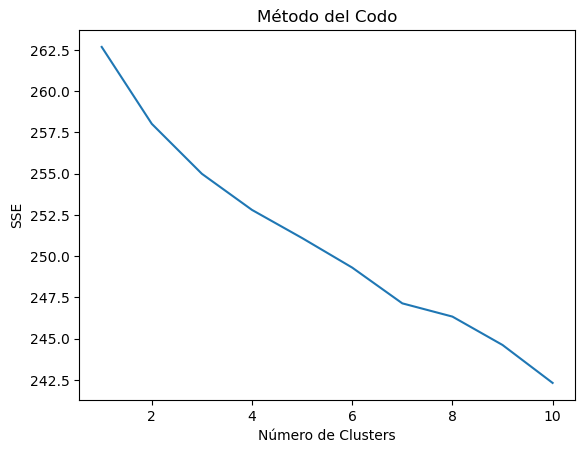

In [90]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Calcular el valor de SSE para diferentes valores de k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_tfidf)
    sse.append(kmeans.inertia_)

# Graficar la curva SSE vs. k
plt.plot(range(1, 11), sse)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

In [93]:
# Aplicar el algoritmo K-Means a la matriz de características
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X_tfidf)

# Obtener los clusters asignados a cada documento
clusters = kmeans.labels_

# Obtener las palabras más comunes de cada cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(7):
    print("Cluster %d:" % i),
    for j in order_centroids[i, :10]:
        print(' %s' % terms[j]),
    print('\n')

Cluster 0:
 quantum
 computing
 course
 clarke
 thomas
 technology
 tomás
 learn
 strategist
 technical


Cluster 1:
 data
 work
 datum
 team
 science
 semilla
 thank
 plan
 rpa
 equinox


Cluster 2:
 happy
 alejandro
 ready
 equinox
 talk
 thank
 salamanca
 ai
 360
 digital


Cluster 3:
 article
 read
 write
 ai
 know
 want
 justice
 conflict
 summary
 syrian


Cluster 4:
 design
 ai
 lab
 holistic
 designer
 want
 asesoftware
 love
 post
 equinox


Cluster 5:
 ai
 human
 model
 technology
 machine
 think
 gpt
 day
 trust
 user


Cluster 6:
 ai
 business
 contact
 artificial
 let
 use
 intelligence
 start
 need
 help




## Bias